In [1]:
# load
import pickle 
import os

work_dir = '/Scottbrowne/members/smd/Projects/SD031/scenicplus/B16_CART'
data_dir = '/Scottbrowne/seq/tmp/devoes/SD031'
tmp_dir =  '/scratch2/devoes/tmp/'

cistopic_obj = pickle.load(open(os.path.join(work_dir, 'ATAC/cistopic_obj_48Topics.pkl'), 'rb'))

In [2]:
# scanpy colors
color_dict = {
    'leiden': {
        '0': "#1f77b4",
        '1': "#ff7f0e",
        '2': "#279e68",
        '3': "#d62728",
        '4': "#aa40fc",
        '5': "#8c564b",
        '6': "#e377c2",
        '7': "#b5bd61",
        '8': "#17becf",
        '9': "#aec7e8",
        '10': '#ffbb78',
        '11': '#98df8a',
        '12': '#ff9896',
        '13': '#c5b0d5',
        '14': '#c49c94'
    }
}

In [3]:
# umap reduction and coloring by scRNA cluster
from pycisTopic.clust_vis import *
run_umap(cistopic_obj, 
         target  = 'cell', # done on cell-topic probabilities (cells as cols, topics as rows, of all the topics a cell was assigned to, what is the probability of the cell belonging to topic j)
         scale=True) 

/home/devoes/miniconda3/envs/SCENICplus_SCA/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/devoes/miniconda3/envs/SCENICplus_SCA/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/devoes/miniconda3/envs/SCENICplus_SCA/lib/pyth

2024-06-20 08:00:33,130 cisTopic     INFO     Running UMAP


/home/devoes/miniconda3/envs/SCENICplus_SCA/lib/python3.10/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


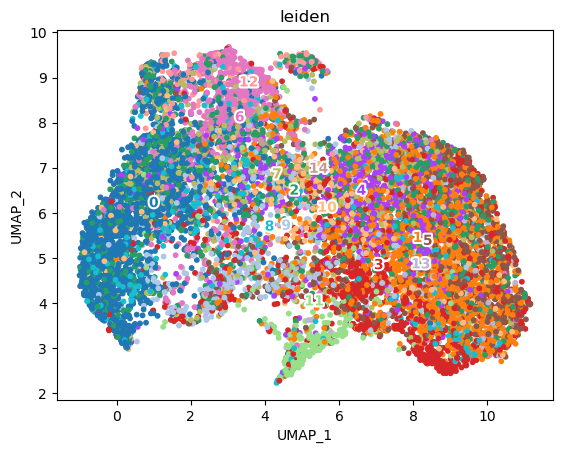

In [4]:
plot_metadata(cistopic_obj, 
              reduction_name = 'UMAP', 
              variables = ['leiden'],
             color_dictionary = color_dict)

In [ ]:
# now plot cell-topic probabilities
if not os.path.exists(os.path.join(work_dir, 'visualization')):
    os.makedirs(os.path.join(work_dir, 'visualization'))

plot_topic(cistopic_obj, reduction_name = 'UMAP', num_columns = 4,
          save = os.path.join(work_dir, 'visualization/umap_topic_contr.pdf'))

In [ ]:
# view topic contributions as a heatmap
cell_topic_heatmap(cistopic_obj,
                     variables = ['leiden'],
                     scale = False,
                     legend_loc_x = 1.05,
                     legend_loc_y = -1.2,
                     legend_dist_y = -1,
                     figsize=(10,10),
                   color_dict = color_dict,
                     save = os.path.join(work_dir, 'visualization/heatmap_topic_contr.pdf'))

In [ ]:
if not os.path.exists(os.path.join(work_dir, 'topic_binarizaiton')):
    os.makedirs(os.path.join(work_dir, 'topic_binarization'))

In [ ]:
# binarize topics using otsu method (topic-region distributions)
from pycisTopic.topic_binarization import *
region_bin_topics_otsu = binarize_topics(cistopic_obj, method='otsu',
                                         plot=True, num_columns=6, save= os.path.join(work_dir, 'topic_binarization/otsu.pdf'))

In [ ]:
# binarize topics using top 3000 regions per topic (topic-region distributions)
region_bin_topics_top3k = binarize_topics(cistopic_obj, method='ntop', ntop = 3000, 
                                          plot=True, num_columns=6, save= os.path.join(work_dir, 'topic_binarization/top3000.pdf'))

In [ ]:
# binarize cell-topic distributions
binarized_cell_topic = binarize_topics(
    cistopic_obj,
    target='cell',
    method='li',
    plot=True,
    num_columns=5, nbins=100)

In [ ]:
# QC metrics 
from pycisTopic.topic_qc import compute_topic_metrics, plot_topic_qc, topic_annotation
import matplotlib.pyplot as plt
from pycisTopic.utils import fig2img

topic_qc_metrics = compute_topic_metrics(cistopic_obj)

fig_dict={}
fig_dict['CoherenceVSAssignments']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Log10_Assignments', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['AssignmentsVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Log10_Assignments', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSRegions_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Regions_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSMarginal_dist']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Marginal_topic_dist', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSGini_index']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Gini_index', var_color='Gini_index', plot=False, return_fig=True)

# Plot topic stats in one figure
fig=plt.figure(figsize=(40, 43))
i = 1
for fig_ in fig_dict.keys():
    plt.subplot(2, 3, i)
    img = fig2img(fig_dict[fig_]) #To convert figures to png to plot together, see .utils.py. This converts the figure to png.
    plt.imshow(img)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0, hspace=-0.70)
plt.show()

In [ ]:
# auto annotation of topis by cluster
topic_annot = topic_annotation(
    cistopic_obj,
    annot_var='leiden',
    binarized_cell_topic=binarized_cell_topic,
    general_topic_thr = 0.2
)

In [ ]:
topic_annot

In [ ]:
# find differentially accessible peaks/regions
from pycisTopic.diff_features import *
imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None,
                                       selected_regions=None, scale_factor=10**6) # scale to shrink low probability values to 0
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                                 plot = False) # ID highly variable regions to speed up hypothesis testing for Diff.Acc.Regions
markers_dict = find_diff_features(cistopic_obj, imputed_acc_obj, 
                                  variable='leiden', var_features=variable_regions, split_pattern = '-')

In [ ]:
# save binarizations and differentially accessible regions
if not os.path.exists(os.path.join(work_dir, 'ATAC/candidate_enhancers')):
    os.makedirs(os.path.join(work_dir, 'ATAC/candidate_enhancers'))
import pickle
pickle.dump(region_bin_topics_otsu, open(os.path.join(work_dir, 'ATAC/candidate_enhancers/region_bin_topics_otsu.pkl'), 'wb'))
pickle.dump(region_bin_topics_top3k, open(os.path.join(work_dir, 'ATAC/candidate_enhancers/region_bin_topics_top3k.pkl'), 'wb'))
pickle.dump(markers_dict, open(os.path.join(work_dir, 'ATAC/candidate_enhancers/markers_dict.pkl'), 'wb'))